<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

_Material adapted from its original author, Joseph Nelson_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

**To get full credit, each code cell must be accompanied by another cell giving plain-English interpretations as if you were speaking to a non-data scientist.**

---

## Basic Level

### Part 1: Read in the data.
Print the head of the data.

_Hint:_ This is a TSV (tab-separated value) file, which means each element of the table is separated by a tab (instead of a `,` or `|` like we've seen in class).

_Hint 2:_ The unicode character for tab is `\t`

In [141]:
DATA_FILE = './data/chipotle.tsv'
import numpy as np
import pandas as pd

In [142]:
chipotle = pd.read_table('./data/chipotle.tsv', sep='\t')

#read in .tsv chipotle data using pd.read_table

In [143]:
#dataset preview using .head()
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [144]:
#dataset preview using .info()
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


### Part 2: Whare the top 5 most commonly ordered items?

In [145]:
#use of value_counts to count occurences of unique orders, using.head() to only show top 5
chipotle.item_name.value_counts().head(5)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

### Use of the 'value_counts' command to calculate the total number of appearances of items in "item_name", used the head() command to only show the top 5. They are: Chicken Bowl, Chicken Burrito, Chips and Guac, Steak Burrito, and Canned Soft Drink

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

_Hint:_ Examine the data to see if the `quantity` column is relevant to this calculation.

_Hint 2:_ String methods can be called via `str`. For example, you might find the following useful:

```python
data.variable.str.replace('xyz', 'abc')
```

_Hint 3:_ Pay close attention to data types here! This is tricky.

In [146]:
# use of str.replace to remove the $ from the item_price column 
chipotle["item_price"] = chipotle["item_price"].str.replace("$", "")
chipotle.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Gu...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25


In [147]:
chipotle['item_price'] = chipotle.item_price.astype('float')
chipotle['order_id'] = chipotle.order_id.astype('object')
# converting item_price to a float (numerical) and the order_id as an object (categorical) so it can be grouped by
# done by using the .astype()

In [148]:
# needed to create a new "item_price" that took into consideration the item quantity 
# created new column that is quantity*item_price, this column is total price and will be used in totalling all orders
chipotle['item_price*quantity'] = chipotle.quantity*chipotle.item_price

#created new dataset that is justthe sum of all orders, grouped ny order_id
orders = chipotle.groupby(["order_id"])["item_price*quantity"].sum()
orders.head()

order_id
1    11.56
2    33.96
3    12.67
4    21.00
5    13.70
Name: item_price*quantity, dtype: float64

In [149]:
#use of the .mean() command to determine the mean of order prices
orders.mean()

21.394231188658654

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for items with `item_name` `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`. You're being asked about the variety of sodas in the `choice_description` column.

In [150]:
# creating a sodas dataset, filtering the original data so that item name is only sodas or sift drinks 
# use of the pipe operator | as the "or" in this line of code
# so that all sodas is all instances of either 'Canned Soft Drink' or 'Canned Soda'
all_sodas = chipotle[(chipotle.item_name =='Canned Soft Drink') | (chipotle.item_name =='Canned Soda')]

In [151]:
# use of the .unique() to grab all unique values from choice_description column 
#converted this to a list using the .tolist() method, found from stack overflow (link below)
unique_sodas = all_sodas['choice_description'].unique().tolist()
# found unique() from https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/ 
# found tolist() from https://stackoverflow.com/questions/1966207/converting-numpy-array-into-python-list-structure
unique_sodas
# Is lemonade considered a soda??

['[Sprite]',
 '[Dr. Pepper]',
 '[Mountain Dew]',
 '[Diet Dr. Pepper]',
 '[Coca Cola]',
 '[Diet Coke]',
 '[Coke]',
 '[Lemonade]',
 '[Nestea]']

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [152]:
#use of the .contains() method again to only pull out Burrito orders from 'item_name'
burritos = chipotle[chipotle['item_name'].str.contains('Burrito', na='False')]
burritos.head(20)

,order_id,quantity,item_name,choice_description,item_price,item_price*quantity
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Gu...",11.75,11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Cheese, Sour Cream]]",8.49,8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]]",8.49,8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Ho...",8.99,8.99
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Pinto Beans, Rice, Ch...",10.98,10.98
27,14,1,Carnitas Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, ...",8.99,8.99
29,15,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Rice, Cheese, Sour Cream]]",8.49,8.49
31,16,1,Steak Burrito,"[[Roasted Chili Corn Salsa (Medium), Fresh Tomato Salsa (Mild)], [Rice, Black Beans, Sour Cream]]",8.99,8.99
43,20,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.75,11.75


In [153]:

# initially was using len() but could not convert the whole column to list 
# so now this code is counting up all the commas to get toppings count
# however there was always one less comma then topping so I added + 1 because the last listed topping will not have a
# corresponding comma
burritos['toppings_count'] = (burritos['choice_description'].str.count(',') + 1)
burritos

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,order_id,quantity,item_name,choice_description,item_price,item_price*quantity,toppings_count
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Gu...",11.75,11.75,8
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25,9.25,7
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Cheese, Sour Cream]]",8.49,8.49,4
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]]",8.49,8.49,6
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Ho...",8.99,8.99,7
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Pinto Beans, Rice, Ch...",10.98,10.98,8
27,14,1,Carnitas Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, ...",8.99,8.99,6
29,15,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Rice, Cheese, Sour Cream]]",8.49,8.49,5
31,16,1,Steak Burrito,"[[Roasted Chili Corn Salsa (Medium), Fresh Tomato Salsa (Mild)], [Rice, Black Beans, Sour Cream]]",8.99,8.99,5
43,20,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.75,11.75,7


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [154]:
#once again use of the .contains() method to only get chip orders
chips = chipotle[chipotle['item_name'].str.contains('Chips', na='False')]
chips.head(20)

,order_id,quantity,item_name,choice_description,item_price,item_price*quantity
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
6,3,1,Side of Chips,NaN,1.69,1.69
10,5,1,Chips and Guacamole,NaN,4.45,4.45
14,7,1,Chips and Guacamole,NaN,4.45,4.45
15,8,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
20,10,1,Chips and Guacamole,NaN,4.45,4.45
25,13,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
30,15,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
32,16,1,Side of Chips,NaN,1.69,1.69


In [155]:
chips_count = chips.item_name.value_counts()
#assigned the value counts to item called chips_count
chips_count.head(10)

Chips and Guacamole                      479
Chips                                    211
Chips and Fresh Tomato Salsa             110
Side of Chips                            101
Chips and Tomatillo Red Chili Salsa       48
Chips and Tomatillo Green Chili Salsa     43
Chips and Tomatillo-Green Chili Salsa     31
Chips and Roasted Chili Corn Salsa        22
Chips and Tomatillo-Red Chili Salsa       20
Chips and Roasted Chili-Corn Salsa        18
Name: item_name, dtype: int64

In [156]:
chips_dictionary = chips_count.to_dict()
# got .to_dict() from https://stackoverflow.com/questions/18695605/python-pandas-dataframe-to-dictionary
# use the .to_dict() to turn the chips data (type of chip order: # of orders of this chips item) into a dictionary 
chips_dictionary

{'Chips and Guacamole': 479,
 'Chips': 211,
 'Chips and Fresh Tomato Salsa': 110,
 'Side of Chips': 101,
 'Chips and Tomatillo Red Chili Salsa': 48,
 'Chips and Tomatillo Green Chili Salsa': 43,
 'Chips and Tomatillo-Green Chili Salsa': 31,
 'Chips and Roasted Chili Corn Salsa': 22,
 'Chips and Tomatillo-Red Chili Salsa': 20,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Mild Fresh Tomato Salsa': 1}

### Part 7: Create a barplot of the frequencies of the chip orders from part 6.

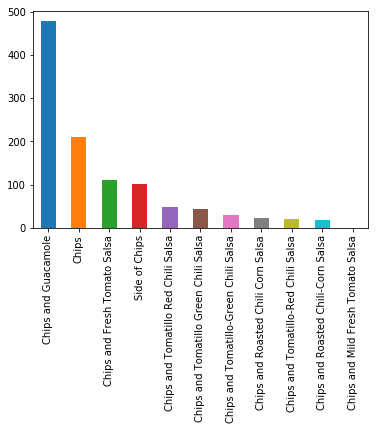

In [158]:
chips.item_name.value_counts().plot(kind='bar');
#using .plot(kind='bar') to plot the bar graph of all chip types and their counts 

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!
